In [ ]:
# NAME : ANOOP JOHN ALOCIOUS
# STUDENT ID: 31084354

In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import word_tokenize    
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive') 

In [5]:
# Reading train and test data
#train = pd.read_csv('/content/drive/MyDrive/axcs_train.csv')

# uploading the datasets and then reading them into colab
train = pd.read_csv('axcs_train.csv')
test = pd.read_csv('axcs_test.csv')
#test = pd.read_csv('/content/drive/MyDrive/axcs_test.csv')

**Text Preprocessing**
1. Convert to lowercase, perform stemming
2. Convert to lowercase, remove stopwords, remove digits/numbers, perform lemmatization


In [7]:
stemmer = PorterStemmer() # for stemming purpose
lemmatizer = WordNetLemmatizer() # for lemmatizing

# Preprocessing technique - 1
# Convert to lowercase, perform stemming
# Function includes parameters to take text and perform preprocessing such as converting the text to lowercase and performing stemming.

def preprocess1(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    #sentence=sentence.replace('{html}',"") 
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    #filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    filtered_words = [stemmer.stem(w) for w in tokens]
    return " ".join(filtered_words)

# Preprocessing technique - 2
# Convert to lowercase, remove stopwords, remove digits/numbers, perform lemmatization
# Function includes parameters to take text and perform preprocessing such as converting the text to lowercase, removing digits, removing special characters
# and performing lemmatization.

def preprocess2(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    #sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [6]:
# Tokenizer for parsing the tokens for the smaller train dataset
vectorizer =TfidfVectorizer(analyzer='word',input='content',
                           lowercase=True,
                           token_pattern='(?u)\\b\\w\\w+\\b',
                           min_df=3,
                           ngram_range=(1,2))

# Tokenizer for parsing the tokens for the larger train dataset
vectorizer2 =TfidfVectorizer(analyzer='word',input='content',
                           lowercase=True,
                           token_pattern='(?u)\\b\\w\\w+\\b',
                           min_df=5,
                           ngram_range=(1,2))

# stopwords in english
stopWords = stopwords.words('english')
print(stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print('Number of training sentences: {:,}\n'.format(train.shape[0]))
print('Number of testing sentences: {:,}\n'.format(test.shape[0]))

Number of training sentences: 54,731

Number of testing sentences: 19,678



In [8]:
# combining dataframe to perform preprocessing
frames = [train, test]
result = pd.concat(frames)
# Applying preprocessing and creating new columns with the output received from each function.
result['p1'] = result.Abstract.apply(preprocess1)  # p1 stands for column with text preprocessed using the first technique
result['p2'] = result.Abstract.apply(preprocess2)  # p2 stands for column with text preprocessed using the second technique

In [9]:
# creating smaller train with the first 1000 instances
train_small = result[0:1000]

# combining all the columns necessary for our modelling process
train_small_X = train_small.filter(['p1', 'p2', 'InfoTheory', 'Math', 'CompVis'], axis=1)

# splitting the test data
x_test = result[54731:]

In [10]:
# checking the count of InfoTheory
train_small_X.groupby('InfoTheory').count()

,p1,p2,Math,CompVis
InfoTheory,,,,
0,998,998,998,998
1,2,2,2,2


In [11]:
# checking the count of Math
train_small_X.groupby('Math').count()

,p1,p2,InfoTheory,CompVis
Math,,,,
0,976,976,976,976
1,24,24,24,24


In [12]:
# checking the count of CompVis
train_small_X.groupby('CompVis').count()

,p1,p2,InfoTheory,Math
CompVis,,,,
0,999,999,999,999
1,1,1,1,1


InfoTheory
[[16062     0]
 [ 3616     0]]
Accuracy: 0.8162414879560931
F1 Score:  0.44941242305540013
Average precision-recall score: 0.45
Math
[[13686    62]
 [ 5791   139]]
Accuracy: 0.7025612358979572
F1 Score:  0.4345904044612124
Average precision-recall score: 0.49
CompVis
[[17526     0]
 [ 2152     0]]
Accuracy: 0.8906392926110377
F1 Score:  0.4710783786689603
Average precision-recall score: 0.09
InfoTheory
[[16062     0]
 [ 3518    98]]
Accuracy: 0.8212216688687874
F1 Score:  0.47703475690478736
Average precision-recall score: 0.41
Math
[[13650    98]
 [ 5627   303]]
Accuracy: 0.7090659619880069
F1 Score:  0.4611829777678561
Average precision-recall score: 0.48
CompVis
[[17526     0]
 [ 2152     0]]
Accuracy: 0.8906392926110377
F1 Score:  0.4710783786689603
Average precision-recall score: 0.09


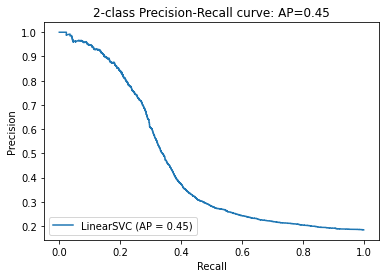

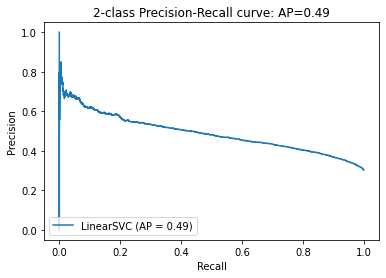

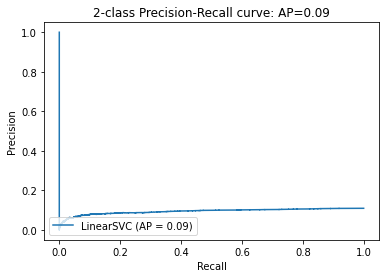

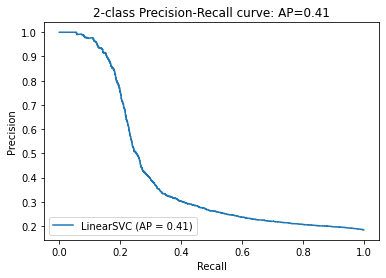

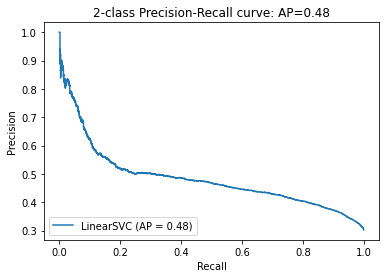

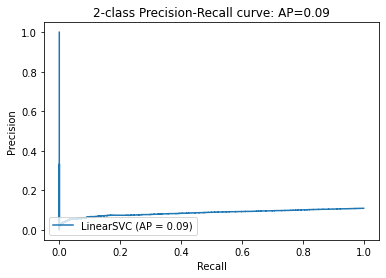

In [ ]:
# gridSearch Parameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# Training our model 
'''
We have trained the model for different labels using the loop, as this helps to avoid writing redundant code 
for the same model on different labels. We are also calculating the accuracy, Precision, recall.
At the end, we obtain the confusion matrix with the results from the model, as well as the precision - recall curve
'''

models = [
    LinearSVC()
]
predicted_values = []
labels = ['InfoTheory', 'Math', 'CompVis']
#labels = ['InfoTheory', 'CompVis', 'Math']
for (columnName, columnData) in train_small_X.iteritems():
  if columnName == 'p1' or columnName == 'p2':
    v = vectorizer.fit_transform(columnData.values)
    testDocs1 = x_test[columnName].tolist()
    X1_test = vectorizer.transform(testDocs1)
    for i in labels: 
      for clf in models:
        model_name = clf.__class__.__name__
        #grid = GridSearchCV(SVC(),param_grid,refit=True)
        clf.fit(v, train_small_X[i])
        #print(model_name)
        y_predict=clf.predict(X1_test)
        #predicted_values.append(y_predict)
        print(i)
        print(confusion_matrix(x_test[i],y_predict))
        y_score = clf.decision_function(X1_test)
        # keep probabilities for the positive outcome only
        average_precision = average_precision_score(x_test[i], y_score)
        f1score = f1_score(x_test[i],y_predict,average='macro')
        accuracy=accuracy_score(x_test[i],y_predict)
        #matthews = matthews_corrcoef(y1_info_test,y_predict) 
        print('Accuracy: '+ str(accuracy))
        print("F1 Score: ", f1score)
        # predict class values
        print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
        disp = plot_precision_recall_curve(clf, X1_test, x_test[i])
        disp.ax_.set_title('2-class Precision-Recall curve: '
                    'AP={0:0.2f}'.format(average_precision))
    

InfoTheory
[[15847   215]
 [  616  3000]]
Accuracy: 0.9577700985872548
F1 Score:  0.9263995635936952
Average precision-recall score: 0.95
Math
[[12816   932]
 [ 1440  4490]]
Accuracy: 0.8794592946437646
F1 Score:  0.8531739249169983
Average precision-recall score: 0.89
CompVis
[[17442    84]
 [  505  1647]]
Accuracy: 0.9700680963512552
F1 Score:  0.9158544910512512
Average precision-recall score: 0.95
InfoTheory
[[15831   231]
 [  592  3024]]
Accuracy: 0.9581766439678829
F1 Score:  0.9274432248624451
Average precision-recall score: 0.95
Math
[[12783   965]
 [ 1418  4512]]
Accuracy: 0.878900294745401
F1 Score:  0.852915373043732
Average precision-recall score: 0.88
CompVis
[[17440    86]
 [  478  1674]]
Accuracy: 0.9713385506657181
F1 Score:  0.9199578978123617
Average precision-recall score: 0.95


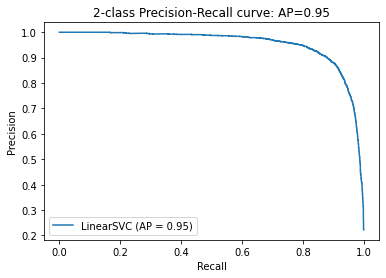

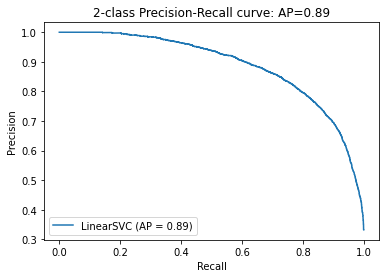

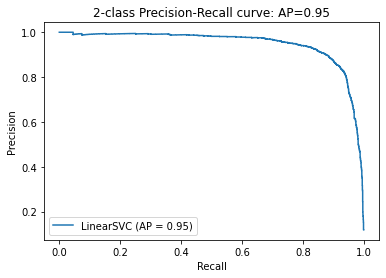

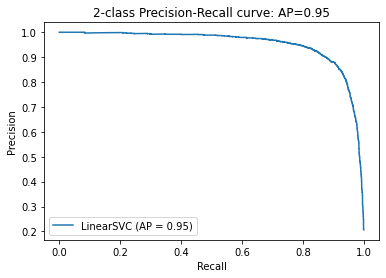

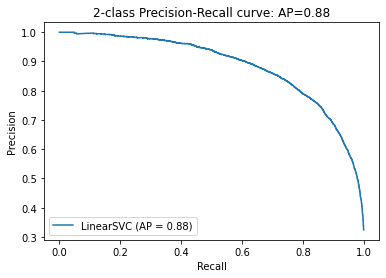

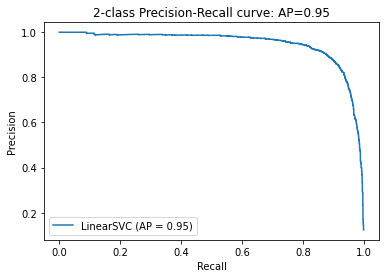

In [ ]:
# training on the entire dataset

main_train = result[:54731]
for (columnName, columnData) in main_train.iteritems():
  if columnName == 'p1' or columnName == 'p2':
    w = vectorizer2.fit_transform(columnData.values)
    #print(v)
    testDocs2 = x_test[columnName].tolist()
    X2_test = vectorizer2.transform(testDocs2)
    #print(X1_test)
    #g = vectorizer.transform(x_test[columnName])
    for i in labels: 
      for clf in models:
        model_name = clf.__class__.__name__
        clf.fit(w, main_train[i])
        #print(model_name)
        y_predict=clf.predict(X2_test)
        #predicted_values.append(y_predict)
        print(i)
        print(confusion_matrix(x_test[i],y_predict))
        y_score = clf.decision_function(X2_test)
        # keep probabilities for the positive outcome only
        average_precision = average_precision_score(x_test[i], y_score)
        f1score = f1_score(x_test[i],y_predict,average='macro')
        accuracy=accuracy_score(x_test[i],y_predict)
        #matthews = matthews_corrcoef(y1_info_test,y_predict) 
        print('Accuracy: '+ str(accuracy))
        print("F1 Score: ", f1score)
        # predict class values
        print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
        disp = plot_precision_recall_curve(clf, X2_test, x_test[i])
        disp.ax_.set_title('2-class Precision-Recall curve: '
                    'AP={0:0.2f}'.format(average_precision))
    

In [17]:
x_test.to_csv (r'small_test.csv', header=True)
tr_sm = result[0:1000]
tr_sm.to_csv(r'small_train.csv', header=True)

**RNN**


In [16]:
import torch
from torchtext.legacy import data

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# creating text field using preprocessing technique 1
TEXT = data.Field(sequential=True, tokenize = 'spacy', lower=True, preprocessing=data.Pipeline(lambda x : preprocess1(x)))
# tokenize = lambda x: x.split()
# TEXT = data.Field(sequential=True, tokenize = tokenize, lower=True) #in case you want to use your own tokenizer
LABEL = data.LabelField(dtype = torch.float, use_vocab=False, preprocessing=int)

In [ ]:
# creating TEXT field using preprocessing technique 2.
TEXT2 = data.Field(sequential=True, tokenize = 'spacy', lower=True, preprocessing=data.Pipeline(lambda x : preprocess2(x)))


In [ ]:
# creating tabular dataset for the entire data with preprocessing technique 1
from torchtext.legacy.data import TabularDataset
# creating datafields to extract necessary columns for TabularDataset
tv_datafields = [(None, None), 
                 (None, None),
                 (None, None),
                 (None, None),
                 ('InfoTheory',LABEL),
                 ("CompVis", LABEL),
                 ("Math", LABEL),
                 ("Abstract", TEXT)
                 ]

# train_data,  test_data = TabularDataset.splits(
# #   path='cola_public/for_torch_text', train='in_domain_train.tsv',
#     path='/content/drive/MyDrive', train='/content/drive/MyDrive/axcs_train.csv',
#     test='/content/drive/MyDrive/axcs_test.csv', format='csv',skip_header=True,
#     fields=tv_datafields)

train_data,  test_data = TabularDataset.splits(
#   path='cola_public/for_torch_text', train='in_domain_train.tsv',
    path = '/content',
    train='/content/axcs_train.csv',
    test='/content/axcs_test.csv', format='csv',skip_header=True,
    fields=tv_datafields)

In [ ]:
# creating tabular dataset for the entire data with preprocessing technique 2
tv_datafields1 = [(None, None), 
                 (None, None),
                 (None, None),
                 (None, None),
                 ('InfoTheory',LABEL),
                 ("CompVis", LABEL),
                 ("Math", LABEL),
                 ("Abstract", TEXT2)
                 ]

train_data1,  test_data1 = TabularDataset.splits(
#   path='cola_public/for_torch_text', train='in_domain_train.tsv',
    path='/content', train='/content/axcs_train.csv',
    test='/content/axcs_test.csv', format='csv',skip_header=True,
    fields=tv_datafields1)

In [ ]:
# for smaller training data with preprocessing technique 1
TEXT3 = data.Field(sequential=True, tokenize = 'spacy', lower=True)
# creating datafields to extract necessary columns for TabularDataset
tv_datafields2 = [ 
                 (None, None),
                  (None, None),
                  (None, None),
                  (None, None),
                  (None, None),
                 ('InfoTheory',LABEL),
                  ("CompVis", LABEL),
                  ("Math", LABEL),
                  (None, None),
                  ("p1", TEXT3),
                  (None, None)
                 ]

train_data2, test_data2 = TabularDataset.splits(
#   path='cola_public/for_torch_text', train='in_domain_train.tsv',
    path='/content', train='/content/small_train.csv',
    test='/content/small_test.csv', format='csv',skip_header=True,
    fields=tv_datafields2)

In [ ]:
# for smaller training data with preprocessing technique 2
TEXT4 = data.Field(sequential=True, tokenize = 'spacy', lower=True)
# creating datafields to extract necessary columns for TabularDataset
tv_datafields3 = [ 
                 (None, None),
                  (None, None),
                  (None, None),
                  (None, None),
                  (None, None),
                 ('InfoTheory',LABEL),
                  ("CompVis", LABEL),
                  ("Math", LABEL),
                  (None, None),
                  (None, None),
                  ("p2", TEXT4)
                 ]

train_data3, test_data3 = TabularDataset.splits(
#   path='cola_public/for_torch_text', train='in_domain_train.tsv',
    path='/content', train='/content/small_train.csv',
    test='/content/small_test.csv', format='csv',skip_header=True,
    fields=tv_datafields3)

In [ ]:
print(f'Number of training examples: {len(train_data1)}')
print(f'Number of testing examples: {len(test_data1)}')

Number of training examples: 54731
Number of testing examples: 19678


In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54731
Number of testing examples: 19678


In [ ]:
print(f'Number of training examples: {len(train_data2)}')
print(f'Number of testing examples: {len(test_data2)}')

Number of training examples: 1000
Number of testing examples: 19678


In [ ]:
print(f'Number of training examples: {len(train_data3)}')
print(f'Number of testing examples: {len(test_data3)}')

Number of training examples: 1000
Number of testing examples: 19678


In [ ]:
MAX_VOCAB_SIZE = 4000

TEXT.build_vocab(train_data, max_size = MAX_VOCAB_SIZE)
print(f"Unique tokens in TEXT1 vocabulary: {len(TEXT.vocab)}")

Unique tokens in TEXT vocabulary: 4002


In [ ]:
MAX_VOCAB_SIZE = 4000

TEXT2.build_vocab(train_data1, max_size = MAX_VOCAB_SIZE)
print(f"Unique tokens in TEXT2 vocabulary: {len(TEXT2.vocab)}")

Unique tokens in TEXT vocabulary: 4002


In [ ]:
# vocab for smaller training dataset 
MAX_VOCAB_SIZE2 = 2500

TEXT3.build_vocab(train_data2, max_size = MAX_VOCAB_SIZE2)
print(f"Unique tokens in TEXT3 vocabulary: {len(TEXT3.vocab)}")

TEXT4.build_vocab(train_data3, max_size = MAX_VOCAB_SIZE2)
print(f"Unique tokens in TEXT4 vocabulary: {len(TEXT4.vocab)}")

Unique tokens in TEXT3 vocabulary: 2502
Unique tokens in TEXT4 vocabulary: 2502


In [ ]:
# Initializing batch size and iterator for training and testing data which are preprocessed using the first technique
BATCH_SIZE = 16

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator,  test_iterator = data.BucketIterator.splits(
    (train_data, test_data), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)
batch = next(train_iterator.__iter__())

In [ ]:
# Initializing iterator for training and testing data which are preprocessed using the second technique with the same batch size
train_iterator1,  test_iterator1 = data.BucketIterator.splits(
    (train_data1, test_data1), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.Abstract),
    sort_within_batch = False)


batch2 = next(train_iterator1.__iter__())

In [ ]:
# # Initializing iterator for smallter training and testing data which are preprocessed using both techniques with the same batch size
BATCH_SIZE = 16

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator2,  test_iterator2 = data.BucketIterator.splits(
    (train_data2, test_data2), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.p1),
    sort_within_batch = False)


batch3 = next(train_iterator2.__iter__())

train_iterator3,  test_iterator3 = data.BucketIterator.splits(
    (train_data3, test_data3), 
    batch_size = BATCH_SIZE,
    device = device,
    sort_key = lambda x: len(x.p2),
    sort_within_batch = False)


batch4 = next(train_iterator3.__iter__())

In [ ]:
# RNN Architecture
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text):

        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        return self.fc(hidden.squeeze(0))

In [ ]:
# RNN hyperparameters for model 1 with preprocessed text using preprocessing technique 1.
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 100
OUTPUT_DIM = 1

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)



In [ ]:
# RNN hyperparameters for model 2 with preprocessed text using preprocessing technique 2.
INPUT_DIM = len(TEXT2.vocab)
EMBEDDING_DIM = 200
HIDDEN_DIM = 200
OUTPUT_DIM = 1

model2 = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [ ]:
# RNN hyperparameters for model 2 with preprocessed text using preprocessing technique 2.
INPUT_DIM2 = len(TEXT3.vocab)
EMBEDDING_DIM2 = 50
HIDDEN_DIM2 = 50
OUTPUT_DIM2 = 1

model3 = RNN(INPUT_DIM2, EMBEDDING_DIM2, HIDDEN_DIM2, OUTPUT_DIM2)
model4 = RNN(INPUT_DIM2, EMBEDDING_DIM2, HIDDEN_DIM2, OUTPUT_DIM2)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')
print(f'The model2 has {count_parameters(model2):,} trainable parameters')


The model has 420,501 trainable parameters
The model2 has 881,001 trainable parameters


In [ ]:
# defining optimizer and criterion parameters for both the models
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=1e-3)
optimizer2 = optim.SGD(model2.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)
model2 = model2.to(device)

In [ ]:
optimizer3 = optim.SGD(model3.parameters(), lr=1e-3)
model3 = model3.to(device)
optimizer4 = optim.SGD(model4.parameters(), lr=1e-3)
model4 = model4.to(device)
criterion = nn.BCEWithLogitsLoss()
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
# training method for model 1 for each label

def train(model, iterator, optimizer, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
          model.train()
          for batch in iterator:
              optimizer.zero_grad()
              predictions = model(batch.Abstract).squeeze(1)
              loss = criterion(predictions, batch.InfoTheory)
              acc = binary_accuracy(predictions, batch.InfoTheory)
              loss.backward()
              optimizer.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    elif label == "Math":
          model.train()
          for batch in iterator:
              optimizer.zero_grad()
              predictions = model(batch.Abstract).squeeze(1)
              loss = criterion(predictions, batch.Math)
              acc = binary_accuracy(predictions, batch.Math)
              loss.backward()
              optimizer.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    else:
          model.train()
          for batch in iterator:
              optimizer.zero_grad()
              predictions = model(batch.Abstract).squeeze(1)
              loss = criterion(predictions, batch.CompVis)
              acc = binary_accuracy(predictions, batch.CompVis)
              loss.backward()
              optimizer.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()
        
    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# training method for model 2 for each label

def train2(model, iterator, optimizer, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
          model2.train()
          for batch in iterator:
              optimizer2.zero_grad()
              predictions = model2(batch2.Abstract).squeeze(1)
              loss = criterion(predictions, batch2.InfoTheory)
              acc = binary_accuracy(predictions, batch2.InfoTheory)
              loss.backward()
              optimizer2.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    elif label == "Math":
          model2.train()
          for batch in iterator:
              optimizer2.zero_grad()
              predictions = model2(batch2.Abstract).squeeze(1)
              loss = criterion(predictions, batch2.Math)
              acc = binary_accuracy(predictions, batch2.Math)
              loss.backward()
              optimizer2.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    else:
          model2.train()
          for batch in iterator:
              optimizer2.zero_grad()
              predictions = model2(batch2.Abstract).squeeze(1)
              loss = criterion(predictions, batch2.CompVis)
              acc = binary_accuracy(predictions, batch2.CompVis)
              loss.backward()
              optimizer2.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()
        
    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# training method for model 3 for each label

def train3(model, iterator, optimizer, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
          model3.train()
          for batch in iterator:
              optimizer3.zero_grad()
              predictions = model3(batch3.p1).squeeze(1)
              loss = criterion(predictions, batch3.InfoTheory)
              acc = binary_accuracy(predictions, batch3.InfoTheory)
              loss.backward()
              optimizer3.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    elif label == "Math":
          model3.train()
          for batch in iterator:
              optimizer3.zero_grad()
              predictions = model3(batch3.p1).squeeze(1)
              loss = criterion(predictions, batch3.Math)
              acc = binary_accuracy(predictions, batch3.Math)
              loss.backward()
              optimizer3.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    else:
          model3.train()
          for batch in iterator:
              optimizer3.zero_grad()
              predictions = model3(batch3.p1).squeeze(1)
              loss = criterion(predictions, batch3.CompVis)
              acc = binary_accuracy(predictions, batch3.CompVis)
              loss.backward()
              optimizer3.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()
        
    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# training method for model 4 for each label

def train4(model, iterator, optimizer, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
          model4.train()
          for batch in iterator:
              optimizer4.zero_grad()
              predictions = model4(batch4.p2).squeeze(1)
              loss = criterion(predictions, batch4.InfoTheory)
              acc = binary_accuracy(predictions, batch4.InfoTheory)
              loss.backward()
              optimizer4.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    elif label == "Math":
          model4.train()
          for batch in iterator:
              optimizer4.zero_grad()
              predictions = model4(batch4.p2).squeeze(1)
              loss = criterion(predictions, batch4.Math)
              acc = binary_accuracy(predictions, batch4.Math)
              loss.backward()
              optimizer4.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()

    else:
          model4.train()
          for batch in iterator:
              optimizer4.zero_grad()
              predictions = model4(batch4.p2).squeeze(1)
              loss = criterion(predictions, batch4.CompVis)
              acc = binary_accuracy(predictions, batch4.CompVis)
              loss.backward()
              optimizer4.step()
              epoch_loss += loss.item()
              epoch_acc += acc.item()
        
    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# Evaluating method for model 1 for each label

def evaluate(model, iterator, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
        model.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model(batch.Abstract).squeeze(1)
                loss = criterion(predictions, batch.InfoTheory)
                acc = binary_accuracy(predictions, batch.InfoTheory)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    elif label == "Math":
        model.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model(batch.Abstract).squeeze(1)
                loss = criterion(predictions, batch.Math)
                acc = binary_accuracy(predictions, batch.Math)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    else:
        model.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model(batch.Abstract).squeeze(1)
                loss = criterion(predictions, batch.CompVis)
                acc = binary_accuracy(predictions, batch.CompVis)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
            
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# Evaluating method for model 2 for each label

def evaluate2(model, iterator, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
        model2.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model2(batch2.Abstract).squeeze(1)
                loss = criterion(predictions, batch2.InfoTheory)
                acc = binary_accuracy(predictions, batch2.InfoTheory)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    elif label == "Math":
        model2.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model2(batch2.Abstract).squeeze(1)
                loss = criterion(predictions, batch2.Math)
                acc = binary_accuracy(predictions, batch2.Math)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    else:
        model2.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model2(batch2.Abstract).squeeze(1)
                loss = criterion(predictions, batch2.CompVis)
                acc = binary_accuracy(predictions, batch2.CompVis)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
            
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# Evaluating method for model 3 for each label

def evaluate3(model, iterator, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
        model3.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model3(batch3.p1).squeeze(1)
                loss = criterion(predictions, batch3.InfoTheory)
                acc = binary_accuracy(predictions, batch3.InfoTheory)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    elif label == "Math":
        model3.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model3(batch3.p1).squeeze(1)
                loss = criterion(predictions, batch3.Math)
                acc = binary_accuracy(predictions, batch3.Math)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    else:
        model3.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model3(batch3.p1).squeeze(1)
                loss = criterion(predictions, batch3.CompVis)
                acc = binary_accuracy(predictions, batch3.CompVis)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
            
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
# Evaluating method for model 4 for each label

def evaluate4(model, iterator, criterion, label):
    
    epoch_loss = 0
    epoch_acc = 0
    
    if label == "InfoTheory":
        model4.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model4(batch4.p2).squeeze(1)
                loss = criterion(predictions, batch4.InfoTheory)
                acc = binary_accuracy(predictions, batch4.InfoTheory)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    elif label == "Math":
        model4.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model4(batch4.p2).squeeze(1)
                loss = criterion(predictions, batch4.Math)
                acc = binary_accuracy(predictions, batch4.Math)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
    else:
        model4.eval()
        with torch.no_grad():
            for batch in iterator:
                predictions = model4(batch4.p2).squeeze(1)
                loss = criterion(predictions, batch4.CompVis)
                acc = binary_accuracy(predictions, batch4.CompVis)
                epoch_loss += loss.item()
                epoch_acc += acc.item()
            
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
# training and printing results for model 1.
# Computing confusion matrix, accuracy & F1-score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_test_loss = float('inf')
labels = ['InfoTheory', 'Math', 'CompVis']
for i in labels:
  y_predict = []
  y_test = []
  train_loss, train_acc = train(model, train_iterator, optimizer, criterion, i)
  test_loss, test_acc = evaluate(model, test_iterator, criterion, i)
  if i == "InfoTheory":
      model.eval()
      with torch.no_grad():
          for batch in test_iterator:
              predictions = model(batch.Abstract).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch.InfoTheory.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score))           
  elif i == "Math":
      model.eval()
      with torch.no_grad():
          for batch in test_iterator:
              predictions = model(batch.Abstract).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch.Math.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score)) 
  else:
    model.eval()
    with torch.no_grad():
        for batch in test_iterator:
              predictions = model(batch.Abstract).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch.CompVis.tolist()
        print(i)
        y_predict = np.asarray(y_predict)
        y_test = np.asarray(y_test)
        print(confusion_matrix(y_test,y_predict))
        accuracy=accuracy_score(y_test,y_predict)
        print('Accuracy: '+ str(accuracy))
        f1score=f1_score(y_test,y_predict,average='macro')
        print('Macro F1 score:'+ str(f1score))   

InfoTheory
[[15979    83]
 [ 3609     7]]
Accuracy: 0.812379306840126
Macro F1 score:0.45010762275495786
Math
[[13668    80]
 [ 5913    17]]
Accuracy: 0.6954466917369652
Macro F1 score:0.41291395258187946
CompVis
[[17459    67]
 [ 2140    12]]
Accuracy: 0.8878442931192194
Macro F1 score:0.4756548481981024


In [ ]:
# training and printing results for model 1.
# Computing confusion matrix, accuracy & F1-score

for i in labels:
  y_predict = []
  y_test = []
  train_loss, train_acc = train2(model2, train_iterator1, optimizer2, criterion, i)
  test_loss, test_acc = evaluate2(model2, test_iterator1, criterion, i)
  if i == "InfoTheory":
      model2.eval()
      with torch.no_grad():
          for batch in test_iterator1:
              predictions = model2(batch2.Abstract).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch2.InfoTheory.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))          
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score))
  elif i == "Math":
      model2.eval()
      with torch.no_grad():
          for batch in test_iterator1:
              predictions = model2(batch2.Abstract).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch2.Math.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score))
  else:
    model2.eval()
    with torch.no_grad():
        for batch in test_iterator1:
              predictions = model2(batch2.Abstract).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch2.CompVis.tolist()
        print(i)
        y_predict = np.asarray(y_predict)
        y_test = np.asarray(y_test)
        print(confusion_matrix(y_test,y_predict))
        accuracy=accuracy_score(y_test,y_predict)
        print('Accuracy: '+ str(accuracy))
        f1score=f1_score(y_test,y_predict,average='macro')
        print('Macro F1 score:'+ str(f1score))  

InfoTheory
[[14760     0]
 [ 4920     0]]
Accuracy: 0.75
Macro F1 score:0.42857142857142855
Math
[[12300     0]
 [ 6150  1230]]
Accuracy: 0.6875
Macro F1 score:0.5428571428571429
CompVis
[[19680]]
Accuracy: 1.0
Macro F1 score:1.0


In [ ]:
# training and printing results for model 3.
# Computing confusion matrix, accuracy & F1-score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_test_loss = float('inf')
labels = ['InfoTheory', 'Math', 'CompVis']
for i in labels:
  y_predict = []
  y_test = []
  train_loss, train_acc = train3(model3, train_iterator2, optimizer3, criterion, i)
  test_loss, test_acc = evaluate3(model3, test_iterator2, criterion, i)
  if i == "InfoTheory":
      model3.eval()
      with torch.no_grad():
          for batch in test_iterator2:
              predictions = model3(batch3.p1).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch3.InfoTheory.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score))           
  elif i == "Math":
      model3.eval()
      with torch.no_grad():
          for batch in test_iterator2:
              predictions = model3(batch3.p1).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch3.Math.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score)) 
  else:
    model3.eval()
    with torch.no_grad():
        for batch in test_iterator2:
              predictions = model3(batch3.p1).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch3.CompVis.tolist()
        print(i)
        y_predict = np.asarray(y_predict)
        y_test = np.asarray(y_test)
        print(confusion_matrix(y_test,y_predict))
        accuracy=accuracy_score(y_test,y_predict)
        print('Accuracy: '+ str(accuracy))
        f1score=f1_score(y_test,y_predict,average='macro')
        print('Macro F1 score:'+ str(f1score))   

InfoTheory
[[18450  1230]
 [    0     0]]
Accuracy: 0.9375
Macro F1 score:0.4838709677419355
Math
[[19680]]
Accuracy: 1.0
Macro F1 score:1.0
CompVis
[[19680]]
Accuracy: 1.0
Macro F1 score:1.0


In [ ]:
# training and printing results for model 4.
# Computing confusion matrix, accuracy & F1-score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_test_loss = float('inf')
labels = ['InfoTheory', 'Math', 'CompVis']
for i in labels:
  y_predict = []
  y_test = []
  train_loss, train_acc = train4(model4, train_iterator3, optimizer4, criterion, i)
  test_loss, test_acc = evaluate4(model4, test_iterator3, criterion, i)
  if i == "InfoTheory":
      model4.eval()
      with torch.no_grad():
          for batch in test_iterator3:
              predictions = model4(batch4.p2).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch4.InfoTheory.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score))           
  elif i == "Math":
      model4.eval()
      with torch.no_grad():
          for batch in test_iterator3:
              predictions = model4(batch4.p2).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch4.Math.tolist()
          print(i)
          y_predict = np.asarray(y_predict)
          y_test = np.asarray(y_test)
          print(confusion_matrix(y_test,y_predict))
          accuracy=accuracy_score(y_test,y_predict)
          print('Accuracy: '+ str(accuracy))
          f1score=f1_score(y_test,y_predict,average='macro')
          print('Macro F1 score:'+ str(f1score)) 
  else:
    model4.eval()
    with torch.no_grad():
        for batch in test_iterator3:
              predictions = model4(batch4.p2).squeeze(1)
              rounded_preds = torch.round(torch.sigmoid(predictions))
              y_predict += rounded_preds.tolist()
              y_test += batch4.CompVis.tolist()
        print(i)
        y_predict = np.asarray(y_predict)
        y_test = np.asarray(y_test)
        print(confusion_matrix(y_test,y_predict))
        accuracy=accuracy_score(y_test,y_predict)
        print('Accuracy: '+ str(accuracy))
        f1score=f1_score(y_test,y_predict,average='macro')
        print('Macro F1 score:'+ str(f1score))   

InfoTheory
[[18450  1230]
 [    0     0]]
Accuracy: 0.9375
Macro F1 score:0.4838709677419355
Math
[[18450  1230]
 [    0     0]]
Accuracy: 0.9375
Macro F1 score:0.4838709677419355
CompVis
[[18450  1230]
 [    0     0]]
Accuracy: 0.9375
Macro F1 score:0.4838709677419355


**Topic Modelling**

In machine learning and natural language processing, a topic model is a type of statistical model for finding abstract "topics" that appears in a collection of documents. Topic modeling is a commonly used text-mining tool in the discovery of hidden semantic structures in a text body. In general, if a given document is about a particular topic, we would expect particular words to appear in the document more or less frequently: "cow" and "milk" will appear more often in documents about cows. 

In this part we are going to develop topic models for different variations in inputs. We will use 2 different preprocessing techniques on the inputs such as:
1. Convert the text to lowercase, remove stopwords and perform stemming.
2. Convert to lowercase, remove stopwords, remove digits and special characters, lemmatize the texts.

Once we have preprocessed the text, we will be creating different topic models based on the first 1000 and 20,000 instances of the training dataset for each preprocessed text. We will be developing 4 different versions with one of the preprocessing techniques and visualize the topics for each version.

**Version 1**

1. Train on 1000 instances of training data.
2. Preprocessing: Convert to lowercase, remove digits, remove words of length < 2 and perform stemming.
3. No Bi-grams included.
4. Number of topics (K) = 5

In [ ]:
train_small = train[0:1000]
docs = train_small.Abstract.tolist()

In [ ]:
len(docs)

1000

In [ ]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.
#docs = [[token for token in doc if not token in stopwords.words('english')] for doc in docs]
t = [[token for token in doc if not token.isnumeric()] for doc in docs]
# Remove words that are only one character.
t = [[token for token in doc if len(token) > 2] for doc in t]
t = [[stemmer.stem(token) for token in doc] for doc in t]

In [ ]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(t)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.5)

In [ ]:
corpus = [dictionary.doc2bow(j) for j in t]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2032
Number of documents: 1000


In [ ]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
NUM_TOPICS = 5
chunksize = len(dictionary)  # 500
passes = 75   # 50
iterations = 100  # 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.
# len, 50, 100 = -1.56
# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics( num_words=20)

Average topic coherence: -1.3769.


[(0,
  '0.019*"word" + 0.018*"model" + 0.012*"base" + 0.011*"method" + 0.010*"from" + 0.009*"pars" + 0.009*"languag" + 0.009*"algorithm" + 0.008*"corpu" + 0.008*"which" + 0.008*"tag" + 0.008*"text" + 0.008*"approach" + 0.008*"statist" + 0.007*"result" + 0.007*"can" + 0.007*"disambigu" + 0.007*"perform" + 0.007*"learn" + 0.006*"present"'),
 (1,
  '0.022*"languag" + 0.018*"system" + 0.012*"model" + 0.011*"process" + 0.010*"from" + 0.009*"speech" + 0.009*"base" + 0.009*"gener" + 0.008*"natur" + 0.008*"inform" + 0.007*"which" + 0.007*"learn" + 0.007*"knowledg" + 0.006*"can" + 0.006*"morpholog" + 0.006*"analysi" + 0.006*"text" + 0.005*"describ" + 0.005*"present" + 0.005*"linguist"'),
 (2,
  '0.015*"algorithm" + 0.013*"problem" + 0.010*"learn" + 0.009*"can" + 0.008*"gener" + 0.008*"which" + 0.007*"base" + 0.007*"comput" + 0.006*"time" + 0.006*"result" + 0.006*"model" + 0.006*"show" + 0.006*"method" + 0.006*"from" + 0.006*"set" + 0.005*"search" + 0.005*"these" + 0.005*"system" + 0.005*"functi

In [ ]:
!pip install pyLDAvis==2.1.2

In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

**Version 2**
1. Train on 1000 instances of training data.
2. Preprocessing: Convert to lowercase, remove stopwords, remove characters of length < 2, remove special character, lemmatize text.
3. Bi-grams included.
4. Number of topics (K) = 5

In [ ]:
train_1000 = train[0:1000]
g = train_1000.Abstract.tolist()

In [ ]:
from nltk.tokenize import RegexpTokenizer
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
cleanr = re.compile('<.*?>')
for idx in range(len(g)):
    g[idx] = g[idx].lower()  # Convert to lowercase.
    cleantext = re.sub(cleanr, '', g[idx])
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    g[idx] = tokenizer.tokenize(rem_num)  # Split into words.
g = [[token for token in doc if len(token) > 2] for doc in g]
g = [[token for token in doc if not token in stopwords.words('english')] for doc in g]
g = [[lemmatizer.lemmatize(token) for token in doc] for doc in g]


In [ ]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(g, min_count=5)
for idx in range(len(g)):
    for token in bigram[g[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            g[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(g)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.5)

In [ ]:
corpus = [dictionary.doc2bow(i) for i in g]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 3047
Number of documents: 1000


In [ ]:
NUM_TOPICS = 5
chunksize = len(dictionary)    # 500
passes = 25           # 50
iterations = 100      # 100
eval_every = None  # Don't evaluate model perplexity, takes too much time. # 500, 30, 100

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics( num_words=20)

Average topic coherence: -1.6491.


[(0,
  '0.022*"model" + 0.013*"word" + 0.012*"based" + 0.012*"language" + 0.009*"algorithm" + 0.008*"method" + 0.008*"data" + 0.007*"problem" + 0.007*"speech" + 0.007*"using" + 0.007*"learning" + 0.007*"corpus" + 0.007*"approach" + 0.006*"statistical" + 0.006*"result" + 0.006*"tree" + 0.005*"used" + 0.005*"system" + 0.005*"set" + 0.005*"context"'),
 (1,
  '0.014*"learning" + 0.011*"algorithm" + 0.009*"language" + 0.008*"structure" + 0.008*"based" + 0.007*"problem" + 0.007*"model" + 0.007*"method" + 0.006*"feature" + 0.006*"system" + 0.006*"representation" + 0.005*"temporal" + 0.005*"semantic" + 0.005*"time" + 0.005*"present" + 0.005*"two" + 0.005*"discourse" + 0.005*"machine" + 0.005*"approach" + 0.005*"result"'),
 (2,
  '0.013*"system" + 0.013*"language" + 0.013*"text" + 0.011*"word" + 0.009*"method" + 0.009*"information" + 0.008*"based" + 0.007*"translation" + 0.007*"corpus" + 0.007*"knowledge" + 0.007*"approach" + 0.007*"analysis" + 0.007*"semantic" + 0.006*"lexical" + 0.006*"using"

In [ ]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

**Version 3**
1. Train on 20,000 instances of training data.
2. Preprocessing: Convert to lowercase, remove digits, remove words of length < 2 and perform stemming
3. No Bi-grams included.
4. Number of topics (K) = 10

In [ ]:
main_train = train[:20000]
docs = main_train.Abstract.tolist()

In [ ]:
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.
t = [[token for token in doc if not token.isnumeric()] for doc in docs]
# Remove words that are only one character.
t = [[token for token in doc if len(token) > 2] for doc in t]
t = [[stemmer.stem(token) for token in doc] for doc in t]

In [ ]:
dictionary = Dictionary(t)
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=8, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in t]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 5605
Number of documents: 20000


In [ ]:
# Set training parameters.
NUM_TOPICS = 10
chunksize = len(dictionary)
passes = 25
iterations = 100
eval_every = None  

temp = dictionary[0]  
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics( num_words=20)

Average topic coherence: -1.7164.


[(0,
  '0.036*"channel" + 0.022*"code" + 0.016*"rate" + 0.013*"decod" + 0.012*"capac" + 0.010*"achiev" + 0.010*"interfer" + 0.010*"relay" + 0.009*"scheme" + 0.009*"receiv" + 0.008*"inform" + 0.008*"sourc" + 0.008*"user" + 0.008*"perform" + 0.007*"error" + 0.007*"multipl" + 0.007*"optim" + 0.007*"signal" + 0.007*"gaussian" + 0.007*"propos"'),
 (1,
  '0.017*"logic" + 0.015*"languag" + 0.014*"program" + 0.012*"system" + 0.012*"model" + 0.010*"semant" + 0.009*"which" + 0.009*"gener" + 0.008*"can" + 0.007*"set" + 0.007*"order" + 0.007*"formal" + 0.007*"base" + 0.007*"type" + 0.007*"theori" + 0.006*"paper" + 0.006*"structur" + 0.006*"rule" + 0.006*"comput" + 0.006*"show"'),
 (2,
  '0.023*"protocol" + 0.023*"secur" + 0.017*"quantum" + 0.014*"commun" + 0.013*"scheme" + 0.012*"key" + 0.012*"attack" + 0.011*"propos" + 0.010*"base" + 0.010*"can" + 0.009*"detect" + 0.009*"paper" + 0.007*"system" + 0.007*"messag" + 0.006*"which" + 0.006*"synchron" + 0.006*"inform" + 0.005*"one" + 0.005*"have" + 0.0

In [ ]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

**Version 4**
1. Train on 20,000 instances of training data.
2. Preprocessing: Convert to lowercase, remove stopwords, remove characters of length < 2, remove special character, lemmatize text.
3. Bi-grams included.
4. Number of topics (K) = 10

In [ ]:
main_train = train[:20000]
docs = main_train.Abstract.tolist()

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
cleanr = re.compile('<.*?>')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    cleantext = re.sub(cleanr, '', docs[idx])
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    docs[idx] = tokenizer.tokenize(rem_num)  # Split into words.
docs = [[token for token in doc if not token in stopwords.words('english')] for doc in docs]
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In [ ]:
bigram = Phrases(docs, min_count=8)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
dictionary = Dictionary(docs)
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=7, no_above=0.5)   # CHECK ON THIS TOMORROW! ALSO REMOVE SINGLE CHARACTERS
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 12922
Number of documents: 20000


In [ ]:
NUM_TOPICS = 10
chunksize = len(dictionary)
passes = 25
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=NUM_TOPICS,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)
model.num_topics

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / NUM_TOPICS
print('Average topic coherence: %.4f.' % avg_topic_coherence)

model.print_topics( num_words=20)

In [ ]:
lda_display = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [ ]:
# Extracting topics using keywords
import re
f = train_small.Abstract.tolist()
titles = train_small.Title.tolist()
y = []
for i in range(0,len(f)):
    x = re.search(r'\bspeech\b',f[i])
    u = re.search(r'\bKorean\b',f[i])
    #w = re.search(r'\bformal\b',f[i])
    if x and u:
      print(titles[i])
      print(f[i])

Phoneme-level speech and natural language intergration for agglutinative languages
 Phoneme-level speech and natural language intergration for agglutinative languages A new tightly coupled speech and natural language integration model is presented for a TDNN-based large vocabulary continuous speech recognition system. Unlike the popular n-best techniques developed for integrating mainly HMM-based speech and natural language systems in word level, which is obviously inadequate for the morphologically complex agglutinative languages, our model constructs a spoken language system based on the phoneme-level integration. The TDNN-CYK spoken language architecture is designed and implemented using the TDNN-based diphone recognition module integrated with the table-driven phonological/morphological co-analysis. Our integration model provides a seamless integration of speech and natural language for connectionist speech recognition systems especially for morphologically complex languages such a

**References**

1. Tutorial content for Week 3
2. Tutorial content for Week 4